# 期货futures

## 新浪网获得期货信息

In [8]:
from urllib import request
import json
import pandas as pd

In [17]:
def get_stock_data(id,scale , data_len):
    url ='http://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol={0}&scale={1}&datalen={2}'.format(id,scale,data_len) 
    # url =f'http://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol={id}&scale={scale}&datalen={data_len}' 

        # 发起请求
    req = request.Request(url)
    # 获取响应
    rsp =request.urlopen(req)
    # 读取响应结果
    res = rsp.read()
    #将json序列转换为Python对象
    res_json =json.loads(res)
    print(res)
    print(res_json)
    # bar列表
    bar_list =[]
    # 将结果逆序
    res_json.reverse()
    # 遍历列表
    for dict in res_json:
        bar = {} 
        bar['date']= dict['day']
        bar['open']= float(dict['open'])
        bar['high']= float(dict['high'])
        bar['low']= float(dict['low'])
        bar['close']= float(dict['close'])
        bar['vol']= int(dict['volume'])
        bar_list.append(bar)#将结果转换为DataFrame对象
        
    df = pd.DataFrame(data=bar_list)
    return df
 

In [18]:
df = get_stock_data(id='./data/sh000002.csv',scale=5,data_len=25)
print(df)

b'null'
None


AttributeError: 'NoneType' object has no attribute 'reverse'

# 移动平均值MA线

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts
import talib


In [24]:
ts_pro =ts.pro_api('eb8dda105ac85d936be57ef3f6522eb3007fbfa9ba4d88ebc4936d13')
# ts_pro =ts.pro_api('8b89009698524877f34a9f86f06046ade2b3caac43a1b941e01959a0')
df = ts_pro.daily(ts_code='000001.SZ', start_date='20230401', end_date='20250404',
                   fields='ts code,trade_date,open,high,low,close,vol')
df = df.reindex(index=df.index[::-1])
df.to_csv('./data/000001.SZ.csv',index=None)

In [25]:
df

,trade_date,open,high,low,close,vol
484,20230403,12.55,12.69,12.46,12.67,740428.86
483,20230404,12.64,12.72,12.59,12.65,647457.22
482,20230406,12.60,12.61,12.50,12.58,563321.30
481,20230407,12.57,12.69,12.50,12.62,607925.26
480,20230410,12.64,12.70,12.58,12.68,640181.81
...,...,...,...,...,...,...
4,20250328,11.39,11.40,11.34,11.35,644945.55
3,20250331,11.36,11.38,11.26,11.26,1116125.64
2,20250401,11.27,11.30,11.22,11.27,681470.42
1,20250402,11.25,11.41,11.25,11.37,932641.76


0         NaN
1         NaN
2         NaN
3         NaN
4      12.640
        ...  
480    11.386
481    11.362
482    11.330
483    11.328
484    11.318
Length: 485, dtype: float64


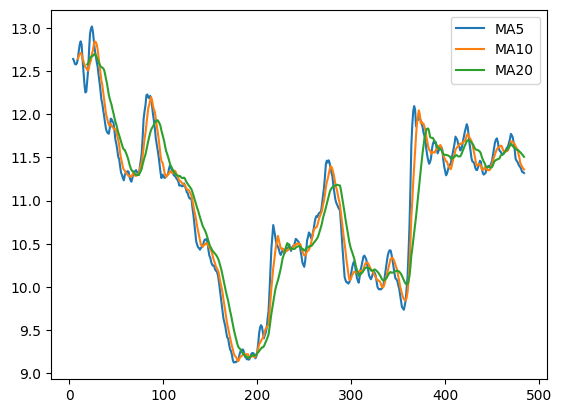

In [28]:
# 读取文件
df = pd.read_csv('./data/000001.SZ.csv')
ma_df = talib.MA(df['close'],timeperiod=5)
print(ma_df)
#计算MA指标
ma5_df = talib.MA(df['close'],timeperiod=5)
ma10_df = talib.MA(df['close'],timeperiod=10)
ma20_df =talib.MA(df['close'],timeperiod=20)
#可视化
fig = plt.figure()
ax= fig.add_subplot(111)
#绘制MA指标
ax.plot(   ma5_df, label='MA5' ) 
ax.plot(  ma10_df, label='MA10')
ax.plot(  ma20_df, label='MA20')
 
plt.legend()
plt.show()

# RSI策略
显示双方力量对比情况 从而判断走势
公式如下

$RSI=\frac{totalUp}{totalUp+totalDown}*100$

10-20之间为市场超卖

80-90之间为市场超买 后续价格回落

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ffn
import talib


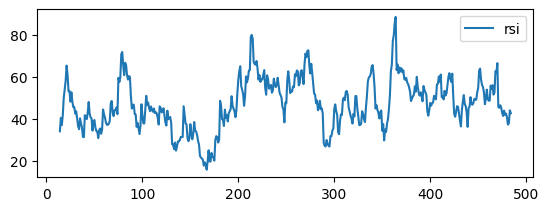

In [33]:
# 是否持仓
hold = False
# 持仓数
pos = 0
# 回测资金
capital = 100000
rest =0
#手续费万三
fee = 0.0003
# 每日盈亏列表
captial_list =[]
#用于计算rsi指标的数组
rsi6_array =np.zeros(7)
# 读取数据
# df = pd.read_csv('./601398.SH.csv')
df = pd.read_csv('./data/000001.SZ.csv')

#计算RSI指标
rsi =talib.RSI(df['close'],timeperiod = 14)# 可视化
 
fig = plt.figure()
ax1 = fig.add_subplot(211)
 
#绘制MA指标
# ax1.plot(   df, label='SZ' )  
ax1.plot(   rsi, label='rsi' )  
 
plt.legend()
plt.show()

In [ ]:
# 计算平仓后的资金
capital=pos*price*(1-fee)+ rest# 持仓数设置为0
pos = 0
#持仓设置为Falsehold = False
print('sell at',date,'price',price,'captial', capital)# 计算每日的市值
if hold == True:
    # 如果持仓，记录当前市值
    captial_list.append(rest + pos*price)
else:
    # 如果没有持仓，记录当前资金
    captial_list.append(capital)
#将资金序列转换为Series对象
capital_series =pd.Series(captial_list)
# 计算资金序列的简单收益率
capital_returns =ffn.to_returns(capital_series)
# 计算收益率
print(ffn.calc_total_return(capital_series))
# 计算最大回撤
print(ffn.calc_max_drawdown(capital_series))
# 计算夏普指标
print(ffn.calc_sharpe(capital_returns))
# 可视化资金曲线
plt.plot(  range(len(captial_list)),captial_list)
plt.show()

In [42]:
from bs4 import BeautifulSoup as bs
import requests

def get_price(url):
    data = requests.get(url) # getting the request from url
    data.encoding='utf8'
    soup =bs(data.text,'html.parser')# converting 
    ans = soup.find("table", id="TabInfo").text
    return ans
url="http://gold.cnfol.com/fol_inc/v6.0/Gold/GoldTD.shtml"
ans = get_price(url)
print(ans)




贵金属名称
最新价
最高价
最低价
收盘价
涨跌
涨跌幅
更新时间





In [41]:
import requests

gold_api_url = "http://gold.cnfol.com/fol_inc/v6.0/Gold/goldhq/json_table/td_tableinfo.json"
response =requests.post(gold_api_url)
response_json=response.json()

#response json
response_json['data'][0]['Last']

'739'